In [ ]:
# ELO 알고리즘 테스트
class ELO:
    def __init__(self, d=400, k=1):
        self.score = {}
        self.d = d # 승률이 10배차이 날 때의 점수차이
        self.k = k # 레이팅 변동 계수

    def add_player(self, player_name, score=0):
        self.score[player_name] = score

    def gameset(self, win_player, lose_player):
        Pa = self.predict(win_player, lose_player)
        k = self.k

        self.score[win_player] += k * (1 - Pa)
        self.score[lose_player] -= k * (1 - Pa)

    def predict(self, win_player, lose_player):
        Ra = self.score[win_player]
        Rb = self.score[lose_player]
        d = self.d
        return 1 / (1 + 10**((Rb - Ra)/d))

    def match(self):
        pass

    def players(self):
        print(self.score)

# Test
elo = ELO(k=32)
elo.add_player('A', 1700)
elo.add_player('B', 1800)
elo.gameset('A', 'B')
print(elo.predict('A', 'B'))
print(elo.predict('B', 'A'))
elo.players()

0.4158489233685628
0.5841510766314373
{'A': 1720.4820799936924, 'B': 1779.5179200063076}


In [ ]:
import random
import matplotlib.pyplot as plt

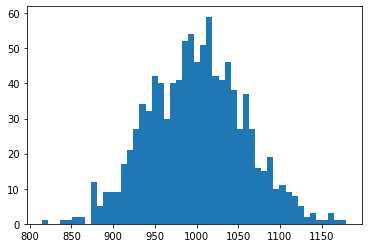

In [ ]:
# ELO 유저 최종 점수 시각화
elo = ELO(k=32)
for i in range(1000):
    elo.add_player(i, 1000)

history = []

for i in range(1000):
    for j in range(50):
        if random.random() > 0.5:
            elo.gameset(i, random.randint(0, 999))
        else:
            elo.gameset(random.randint(0, 999), i)

    history.append(list(elo.score.values()))

plt.hist(history[-1], bins=50)
plt.show()

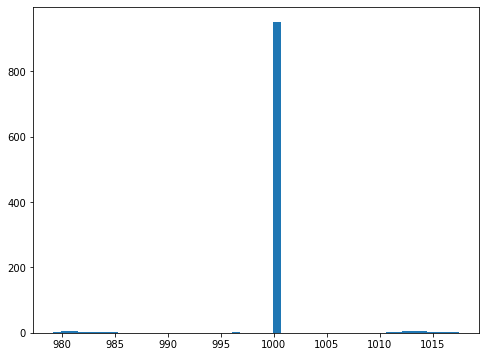

In [ ]:
# ELO 변화 시각화

from matplotlib import rc
import matplotlib.pyplot as plt
import matplotlib.animation as animation

rc('animation', html='jshtml')
fig = plt.figure(figsize=(8,6))

def frame(i):
    fig.clear()
    return plt.hist(history[i], bins=50)

anim = animation.FuncAnimation(fig, frame, frames=100, blit=False, repeat=True)
anim